# Based on 'Figures for paper' notebook format

This notebook holds the results of

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sys
import os
path = "/scratch/l/lfefebvr/noorir/model/"
sys.path.insert(0, path)

OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

debugpath = "/scratch/l/lfefebvr/noorir/model/111/"


# Debug node stuff

In [12]:
# results from debug node
extra = 'aug31/1740109/'
exec(open(debugpath+extra+'load_km_beta_short.py').read()) #loading variables into the environment

full_list = glob.glob(debugpath+extra+"*") #list of all results for a single job

#first get the lowest cost
low = 5
for res in full_list:
    res_file = os.path.basename(res)
    if "vector" in res_file:
        start = res_file.index("cost", 10)+len("cost")
        end = res_file.index(".npy")
        #print(float(res_file[start:end]))

        if float(res_file[start:end])< low:
            low = float(res_file[start:end])

#now get the results from the rank with lowest cost
full_res = glob.glob(debugpath+extra+"*"+str(low)+".npy")
#print("low", low)
print(full_res)

# load the result numpy arrays
for res in full_res:
    if "vector_best_sols_" in res:
        vector_best_sols = np.load(res)
        print("vb ", vector_best_sols.shape)
    elif "vector_costs_" in res:
        vector_costs = np.load(res)
        print("vc ", vector_costs.shape)
    else:
        vector_est = np.load(res)
        print("ve ", vector_est.shape)

starting...
generating target data...
['/scratch/l/lfefebvr/noorir/model/111/aug31/1740109/vector_costs_rank15_cost2.773658413873067.npy', '/scratch/l/lfefebvr/noorir/model/111/aug31/1740109/vector_best_sols_rank15_cost2.773658413873067.npy', '/scratch/l/lfefebvr/noorir/model/111/aug31/1740109/vector_est_rank15_cost2.773658413873067.npy']
vc  (55,)
vb  (55,)
ve  (45,)


2.77365841387
average delay:  60.4


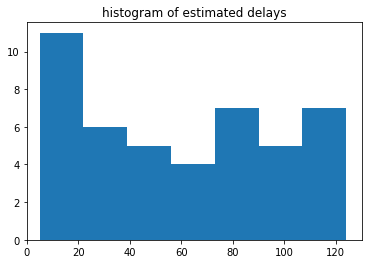

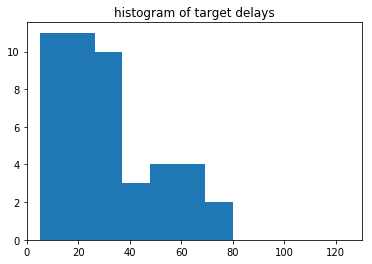

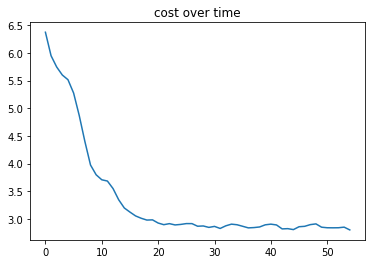

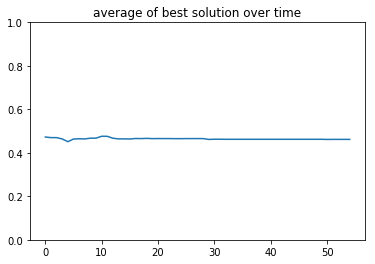

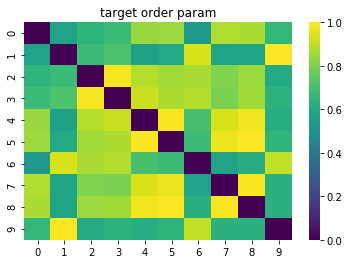

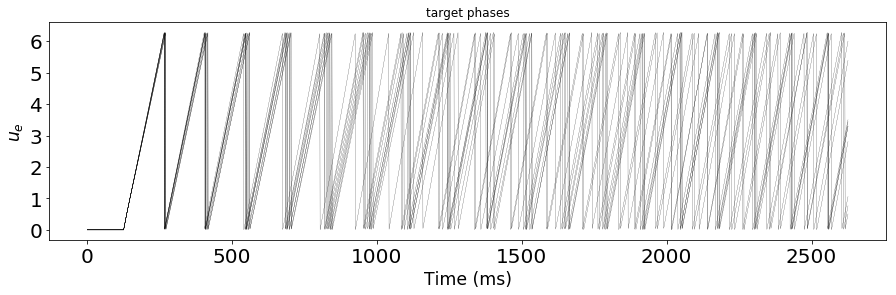

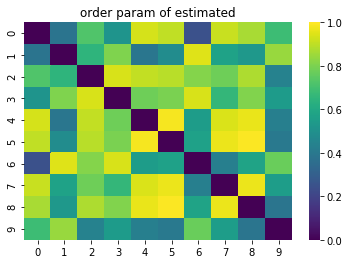

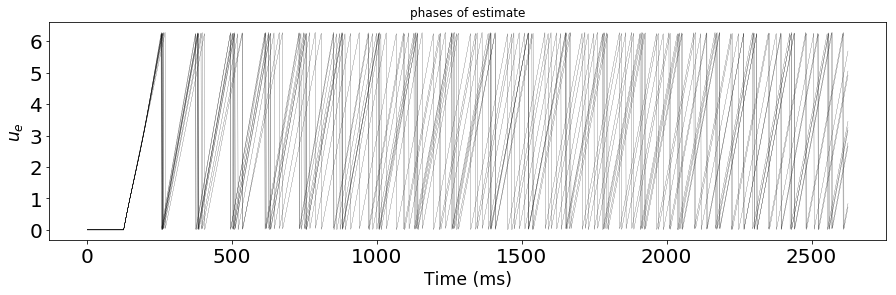

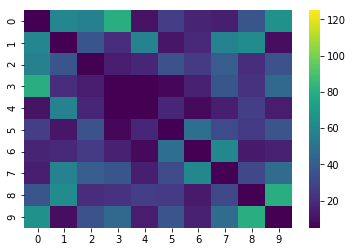

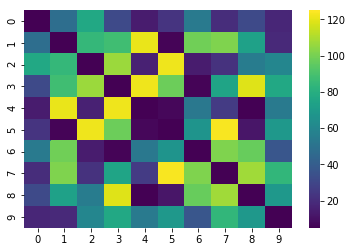

mse delay 2191.52


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide


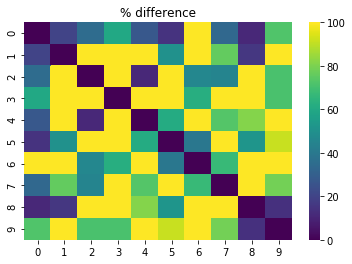

In [13]:
%matplotlib inline


final_res = hf.residuals_km(vector_est, km_params, nodes, targ_data, w_mat, 
                            upper_b, evol_params['res_metric'])
print(final_res)
print("average delay: ", np.average(vector_est))

# histogram of estimated delays
plt.hist(vector_est, bins = 'auto')
plt.xlim(lower_b-5,upper_b + 5)
plt.title('histogram of estimated delays')
plt.show()

# histogram of target delays
plt.hist(hf.matrix2p(d_mat, 10), bins = 'auto')
plt.xlim(lower_b-5,upper_b + 5)
plt.title('histogram of target delays')
plt.show()

# cost over time
plt.plot(vector_costs)
plt.title('cost over time')
plt.show()

# average of best solution over time
plt.plot(vector_best_sols)
plt.ylim(0,1)
plt.title('average of best solution over time')
plt.show()

# plot target r matrice
corr_r = hf.order_param_matrix(ue_array, nodes, skip= upper_b+10)
np.fill_diagonal(corr_r, 0)
sns.heatmap(corr_r, cmap = 'viridis', vmin = 0, vmax =1)
plt.title("target order param")
plt.show()

# plot target time series
plt.figure(3, figsize=(15,4))
for sing_node in range(nodes):
    plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
#plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("target phases")
plt.show()

# estimated data
d_mat_exp = hf.p2matrix(vector_est,nodes).astype(int)
ue_array_exp = hf.wcm.km_model_sim_d(km_params, d_mat_exp, upper_b, w_mat, 
                                     nodes)

#correlation matrix of estimated
exp_data = hf.order_param_matrix(ue_array_exp, nodes, skip= upper_b+10)
np.fill_diagonal(exp_data, 0)
sns.heatmap(exp_data, vmin = 0, vmax =1, cmap = "viridis")
plt.title("order param of estimated")
plt.show()

#time series of estimate
plt.figure(3, figsize=(15,4))
for sing_node in range(nodes):
    plt.plot(ue_array_exp[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
#plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("phases of estimate")
plt.show()
#%%
# matrix to show the difference
# target delays
sns.heatmap(d_mat, cmap = "viridis", vmin = lower_b, vmax =upper_b)
plt.show()
# estiamted delays
sns.heatmap(d_mat_exp, cmap = "viridis", vmin = lower_b, vmax =upper_b)
plt.show()

print('mse delay', hf.mse(d_mat,d_mat_exp))

# % difference between target and estimated delay
thing = ((np.absolute(d_mat_exp-d_mat)/d_mat))*100
np.fill_diagonal(thing,0)
sns.heatmap(thing, cmap= 'viridis', vmax =100)
plt.title('% difference')
plt.show()


# REGULAR RUNS

# Choosing which jobs to analyze

In [2]:
JOB = ['1741091']
NTASKS =[40]
NUM_JOBS = len(JOB)

# jobs for 3 diff cases runs
# correlation, ploi+corr

# Saving the names of the variable load files for each run

In [3]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load*")
    if len(var) ==1:
        load_files[job] = var[0]
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 1


{'1741091': '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/load_km_beta_long.py'}

In [6]:
full_list


['/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_est_rank37_cost3.217230701621795.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_est_rank28_cost3.507494240962634.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_costs_rank37_cost3.217230701621795.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_best_sols_rank21_cost3.640586776347909.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_best_sols_rank22_cost3.338867245299681.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_best_sols_rank7_cost3.0050059769389366.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_est_rank9_cost3.886386316740305.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_costs_rank6_cost3.1632914439462594.npy',
 '/scratch/l/lfefebvr/noorir/model/Output/2019-08-31/1741091/vector_best_sols_rank24_cost3.408627387654171.npy',
 '/scratch

# Creating a dictionary to hold all the best solution vectors (all_res)

In [7]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm
#
all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"vector*") #list of all results for a single job
    #first get the lowest cost
    low = 5
    for res in full_list:
        res_file = os.path.basename(res)
        start = res_file.index("cost", 10)+len("cost")
        end = res_file.index(".npy")
        if float(res_file[start:end])< low:
            low = float(res_file[start:end])
    #now get the results from the rank with lowest cost
    full_res = glob.glob(OUTPUT_PATH+"*/"+job+"/*"+str(low)+".npy")
    #print(full_res)

    # load the result numpy arrays
    for res in full_res:
        if "vector_best_sols_" in res:
            vector_best_sols = np.load(res)
            print("vb ", vector_best_sols.shape)
        elif "vector_costs_" in res:
            vector_costs = np.load(res)
            print("vc ", vector_costs.shape)
        else:
            vector_est = np.load(res)
            print("ve ", vector_est.shape)
    
    all_res[job]= [vector_best_sols, vector_costs, vector_est]
    print(i," Job: "+job+", lowest MSE: ", low)
    i = i+ 1

vb  (200,)
ve  (45,)
vc  (200,)
0  Job: 1741091, lowest MSE:  2.7275015311027624


starting...
generating target data...
1741091
2.7275015311
average delay:  60.0888888889


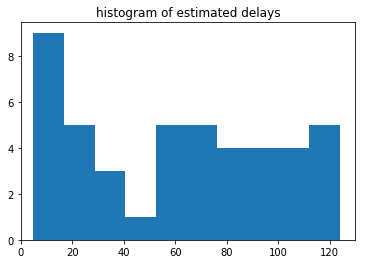

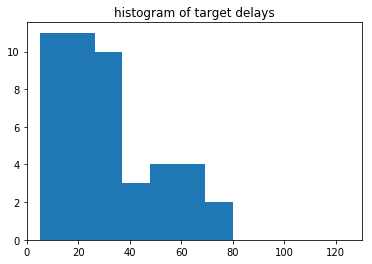

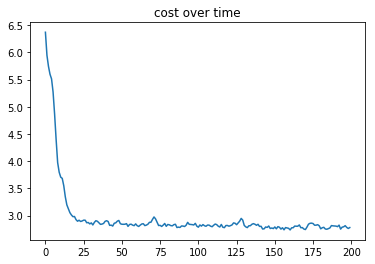

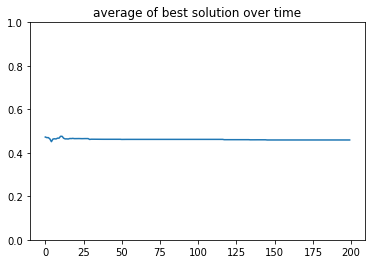

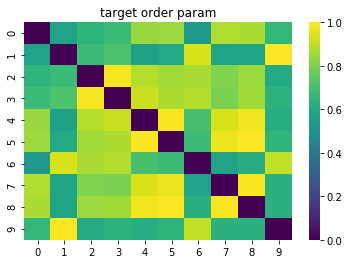

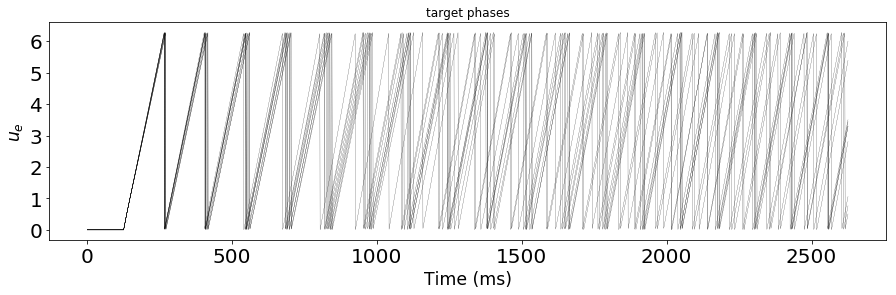

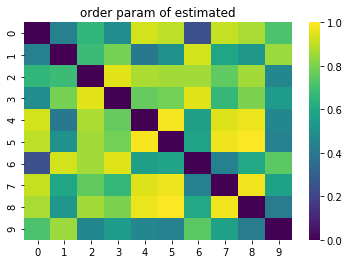

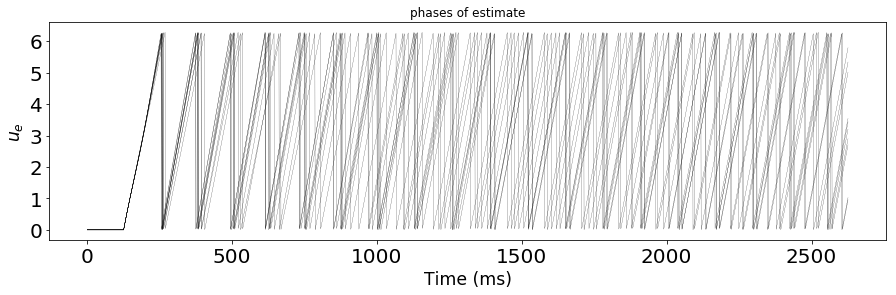

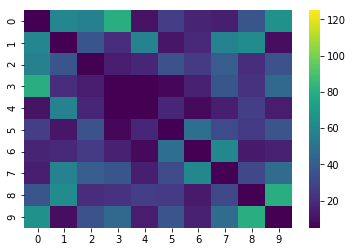

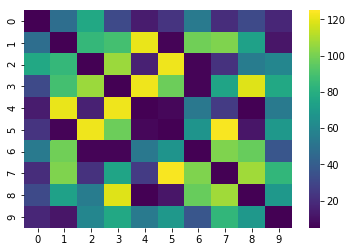

mse delay 2197.56


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


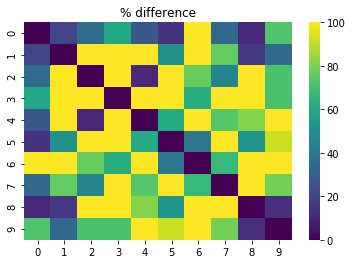

In [9]:
JOB_NUM = 0
import matplotlib.pyplot as plt
%matplotlib inline

exec(open(load_files[JOB[JOB_NUM]]).read())
print(JOB[JOB_NUM])

final_res = hf.residuals_km(vector_est, km_params, nodes, targ_data, w_mat, 
                            upper_b, evol_params['res_metric'])
print(final_res)
print("average delay: ", np.average(vector_est))

# histogram of estimated delays
plt.hist(vector_est)
plt.xlim(lower_b-5,upper_b + 5)
plt.title('histogram of estimated delays')
plt.show()

# histogram of target delays
plt.hist(hf.matrix2p(d_mat, 10), bins = 'auto')
plt.xlim(lower_b-5,upper_b + 5)
plt.title('histogram of target delays')
plt.show()

# cost over time
plt.plot(vector_costs)
plt.title('cost over time')
plt.show()

# average of best solution over time
plt.plot(vector_best_sols)
plt.ylim(0,1)
plt.title('average of best solution over time')
plt.show()

# plot target r matrice
corr_r = hf.order_param_matrix(ue_array, nodes, skip= upper_b+10)
np.fill_diagonal(corr_r, 0)
sns.heatmap(corr_r, cmap = 'viridis', vmin = 0, vmax =1)
plt.title("target order param")
plt.show()

# plot target time series
plt.figure(3, figsize=(15,4))
for sing_node in range(nodes):
    plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
#plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("target phases")
plt.show()

# estimated data
d_mat_exp = hf.p2matrix(vector_est,nodes).astype(int)
ue_array_exp = hf.wcm.km_model_sim_d(km_params, d_mat_exp, upper_b, w_mat, 
                                     nodes)

#correlation matrix of estimated
exp_data = hf.order_param_matrix(ue_array_exp, nodes, skip= upper_b+10)
np.fill_diagonal(exp_data, 0)
sns.heatmap(exp_data, vmin = 0, vmax =1, cmap = "viridis")
plt.title("order param of estimated")
plt.show()

#time series of estimate
plt.figure(3, figsize=(15,4))
for sing_node in range(nodes):
    plt.plot(ue_array_exp[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
#plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("phases of estimate")
plt.show()
#%%
# matrix to show the difference
# target delays
sns.heatmap(d_mat, cmap = "viridis", vmin = lower_b, vmax =upper_b)
plt.show()
# estiamted delays
sns.heatmap(d_mat_exp, cmap = "viridis", vmin = lower_b, vmax =upper_b)
plt.show()

print('mse delay', hf.mse(d_mat,d_mat_exp))

# % difference between target and estimated delay
thing = ((np.absolute(d_mat_exp-d_mat)/d_mat))*100
np.fill_diagonal(thing,0)
sns.heatmap(thing, cmap= 'viridis', vmax =100)
plt.title('% difference')
plt.show()


# un edited below

# Heatmaps - target CV vs estimated CV

- list of all mse CV values (all_mse)
- dictionary of all target CV matrices (all_res_true)

In [ ]:
all_mse = []
all_res_true = {} #dictionary of all the target arrays

##########################################################################
def plot_heat_cv(data, num_i = 0):
    """
    data is on the order of mm/s
    """
    %matplotlib inline
    sns.heatmap(hf.p2matrix(data,10)/1000, vmax = 10, vmin = 0.5, cmap = "viridis")
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    #plt.savefig(JOB[num_i]+"est_cv.png", facecolor = "None")
    plt.show()
##########################################################################

for i in range(NUM_JOBS):
    
    # visual dividers
    if i in range(0,3):
        print("--------------------------CORR------------------------------------")
    if i in range(2,NUM_JOBS):
        print("--------------------------PLI+CORR------------------------------------")
        
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    all_res_true[JOB[i]] = c_mat
    if i == 1:
        master_tract = tract_mat
    
    # Calculate MSE between true and target for each
    thing = np.triu(np.reciprocal(all_res_true[JOB[i]], where = all_res_true[JOB[i]] >0),1).ravel()
    true_cv_vec = thing[thing != 0]
    err = hf.mse(true_cv_vec/1000,all_res[JOB[i]]/1000)
    all_mse.append(err)
    print(JOB[i], " true vs est: mse = ", err)
    #if you want to white-out the diagonals:
    #sns.heatmap(hf.p2matrix(thing[thing != 0],10)/1000, mask = hf.p2matrix(thing[thing != 0],10)/1000 ==0, 
    #            vmax = 10, vmin = 0.5, cmap = "viridis")
    plot_heat_cv(true_cv_vec,i)
    plot_heat_cv(all_res[JOB[i]],i)

In [ ]:
all_mse

In [ ]:
#save all matrices of all res
# for i in range(len(JOB)):
#     np.save(JOB[i],hf.p2matrix(all_res[JOB[i]],10)/1000)

# Target Data - Plot of MEG time series and Correlation Matrix

In [ ]:
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read())
    print(JOB[i])
    
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()


# Histograms of all the estimated CV estimates

- mean and std of distribution for each network estimation (the #'s that show on top of the plots):
- gr_means = []
- gr_std = []

In [ ]:
#Estimates

gr_means = []
gr_std = []
for cv in range(NUM_JOBS):
    
    # visual dividers
    if cv in range(0,3):
        print("--------------------------CORR------------------------------------")
    if cv in range(2,NUM_JOBS):
        print("--------------------------PLI+CORR-----------------------------------------")
        
    print(JOB[cv], "cv estimate distribution")
    # the histogram of the data
    n, bins, patches = plt.hist(all_res[JOB[cv]]/1000, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))
    if JOB[cv] == "1385054":
        n, bins, patches = plt.hist(all_res[JOB[cv]]/1000, density=True, facecolor='blue', alpha=0.5, range = (0.005,0.2))


    mu = np.average(all_res[JOB[cv]]/1000)
    sigma = np.std(all_res[JOB[cv]]/1000)
    
    gr_means.append(mu)
    gr_std.append(sigma)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    
    print(JOB[cv], "signal delay estimate distribution")
    trac = np.triu(master_tract,1).ravel()
    trac= trac[trac > 0]
    # the histogram of the data
    n, bins, patches = plt.hist((trac/all_res[JOB[cv]])*1000, density=True, facecolor='blue', alpha=0.5, range = (0,100))
    
    mu = np.average((trac/all_res[JOB[cv]])*1000)
    sigma = np.std((trac/all_res[JOB[cv]])*1000)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()


# Target CV and Signal Delays

In [ ]:
for cv in range(NUM_JOBS):    

    # visual dividers
    if cv in range(0,3):
        print("--------------------------CORR------------------------------------")
    if cv in range(3,NUM_JOBS):
        print("--------------------------PLI+CORR-----------------------------------------")
        
    # the histogram of the data
    print(JOB[cv], "cv true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(vec, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))
        if JOB[cv] == "1385054":
            n, bins, patches = plt.hist(vec, density=True, facecolor='blue', alpha=0.5, range = (0.005,0.2))
            print(vec)


        mu = np.average(vec)
        sigma = np.std(vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()
        

    # the histogram of the data
    print(JOB[cv], "signal delay true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    trac = np.triu(tract_mat,1).ravel()
    trac= trac[trac > 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(trac/vec, density=True, facecolor='blue', alpha=0.5, range = (0,100))

        mu = np.average(trac/vec)
        sigma = np.std(trac/vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()

# Looking at solution matrices + time series

# 1 : CORRELATION


In [ ]:
for i in range(0,3):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, vmax_ , vmin_ = hf.residuals_cw_corr(all_res[JOB[i]], wc_params, nodes, targ_data, w_mat,
                                            skip, wc_seed, evol_params['optim'], tract_mat, 
                                            heavyside= evol_params['heavi'],plot ="cw")
    
    #plot the correlation matrix
    import seaborn as sns
    skip = 200
    exp_data = hf.plot_cor_mat(ue_array_, nodes, skip)
    np.fill_diagonal(exp_data, 0)
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"corr.png", facecolor = "None")
    plt.show()
    
    
    #plot the true correlation matrix
    import seaborn as sns
    skip = 200
    plt.figure()
    sns.heatmap(targ_data, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"corr_true.png", facecolor = "None")
    plt.show()
    print("MSE", res_)

    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array_, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.savefig(JOB[i]+"ts.png", facecolor = "None")
    plt.show()
    

# 3 : CORRELATION + PLI

In [ ]:
for i in range(3,6):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, exp_data_pli_, exp_data_corr_ = hf.residuals_pli_corr(all_res[JOB[i]], wc_params, fs, nodes,
                                                                    targ_data_corr, targ_data_pli, w_mat, chunk, skip, wc_seed,
                                                                     evol_params['optim'], tract_mat,
                                                                     evol_params['heavi'], 
                                                                     fmin, fmax, plot = True)
    
    #plot the correlation matrix
    import seaborn as sns
    skip = 200
    exp_data = hf.plot_cor_mat(ue_array_, nodes, skip)
    np.fill_diagonal(exp_data_corr_, 0)
    plt.figure()
    sns.heatmap(exp_data_corr_, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"corr.png", facecolor = "None")

    plt.show()
    
    #plot the pli matrix
    import seaborn as sns
    skip = 200
    
    exp_data = exp_data_pli_
    for row in range(1,nodes):
        for col in range(0, row):
            exp_data[col,row] = exp_data[row,col]
            
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =0)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"pli.png", facecolor = "None")

    plt.show()
    print("MSE", res_)

    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.savefig(JOB[i]+"ts.png", facecolor = "None")

    plt.show()

# EXTRA

In [1]:
# Dynamic time warping stuff



%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


# We define two sequences x, y as numpy array
# where y is actually a sub-sequence from x
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

from dtw import dtw

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2

dist, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)

dist


ModuleNotFoundError: No module named 'dtw'

In [ ]:
low = 5
high = 200
seed2 = 200
rng = np.random.RandomState(seed2)

vals = []




c_mat_v = rng.uniform(low = 4000,high=7000, size=(num_dim))
c_mat = hf.p2matrix(c_mat_v, nodes)
c_mat = np.reciprocal(c_mat)
np.fill_diagonal(c_mat,0)
plt.hist(np.concatenate((np.random.normal(55,50, 250),np.random.normal(150,50, 250))))
plt.show()

In [ ]:
np.concatenate((np.random.normal(2,1, 500),np.random.normal(2,1, 500))).shape

# Helper Functions

In [ ]:
def plot_ts(nodes, all_ts):
    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])
    plt.show()
    